# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import Data

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [9]:
# adding a BMI category column 
bins = [0, 18.5, 25, 30, np.inf] # np.inf for the upper bound of the last category
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

# Create the 'bmi_category' column
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=True)

In [10]:
numerical_features = df.select_dtypes(include='number')
categorical_features = df.select_dtypes(include='category')
target = 'charges'

# Dataset Distributions

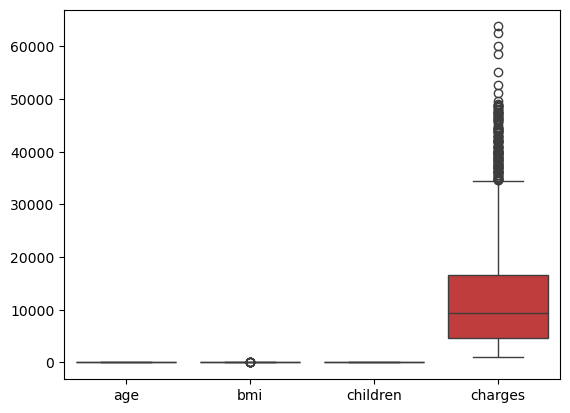

In [11]:
sns.boxplot(df)
plt.show()

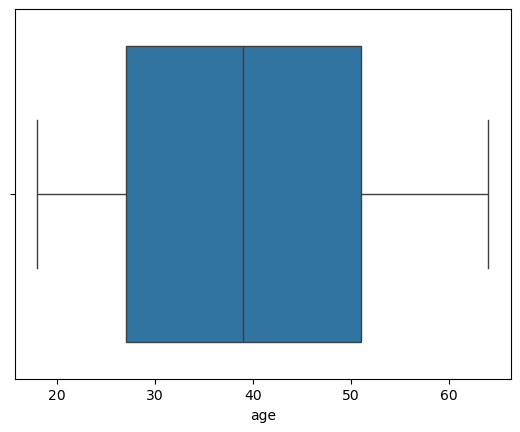

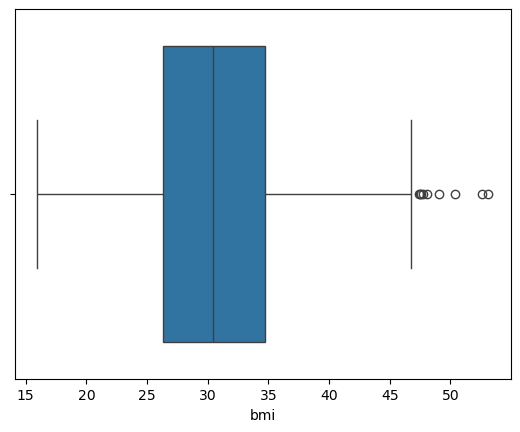

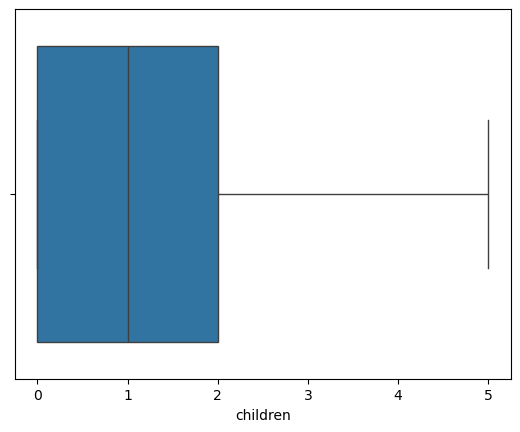

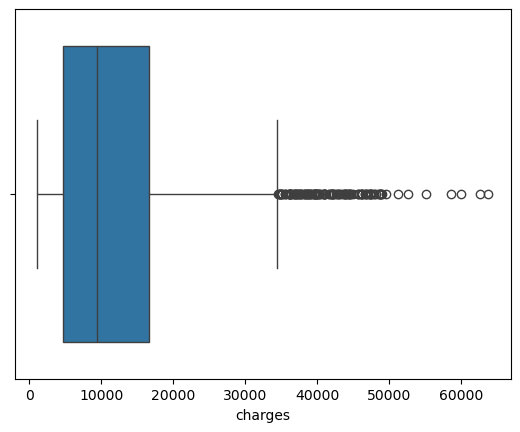

In [12]:
for column in numerical_features:
    sns.boxplot(data=df, x=column)
    plt.show()

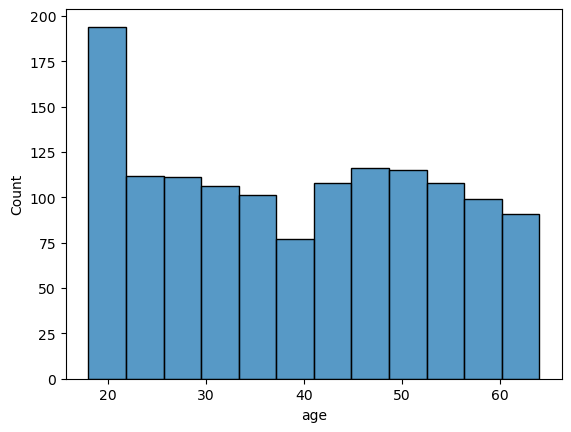

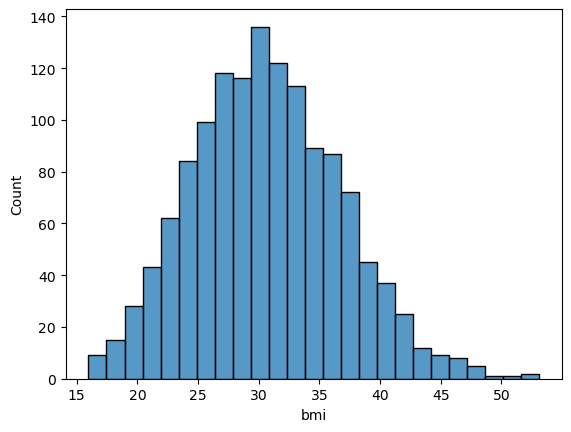

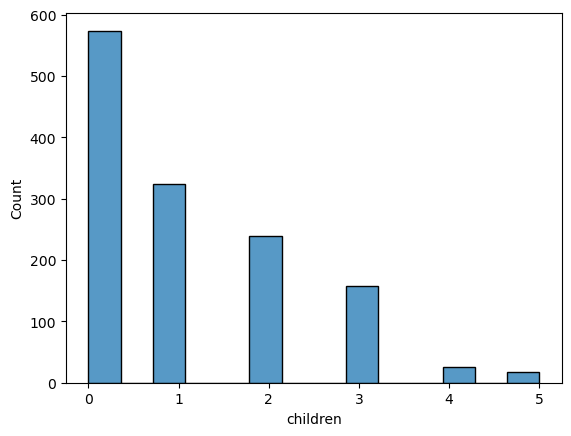

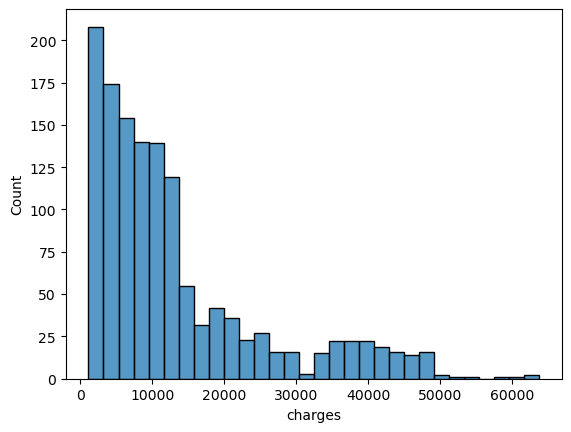

In [13]:
for column in numerical_features:
    sns.histplot(data=df, x=column)
    plt.show()

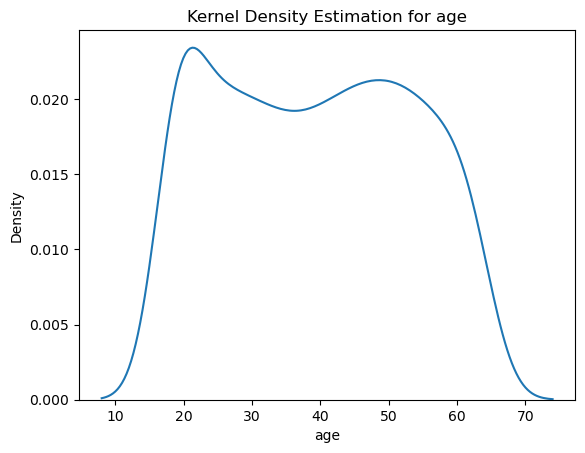

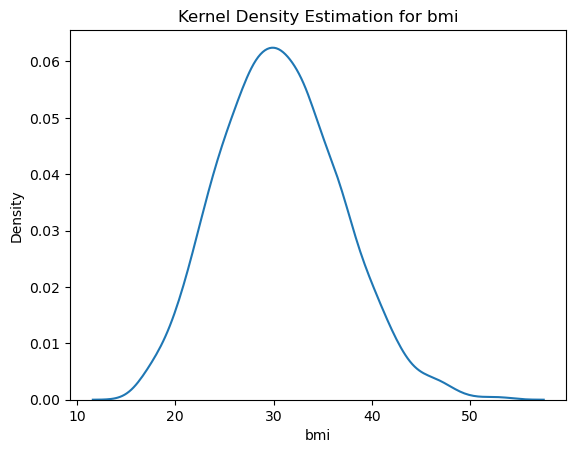

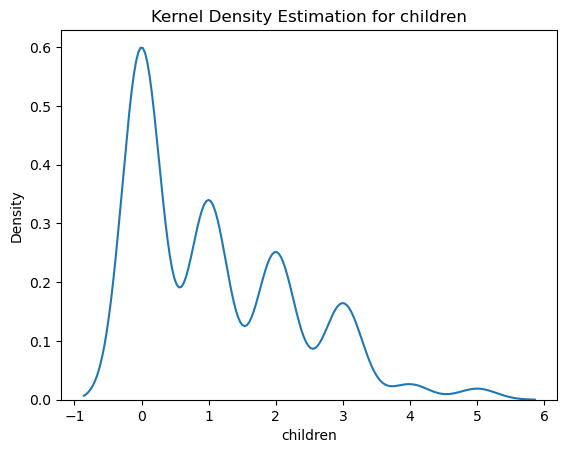

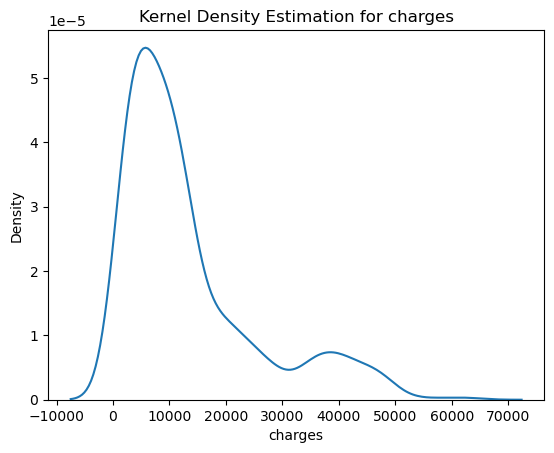

In [14]:
for column in numerical_features:
    sns.kdeplot(data=df, x=column)
    plt.title(f'Kernel Density Estimation for {column}')
    plt.show()

# Correlations

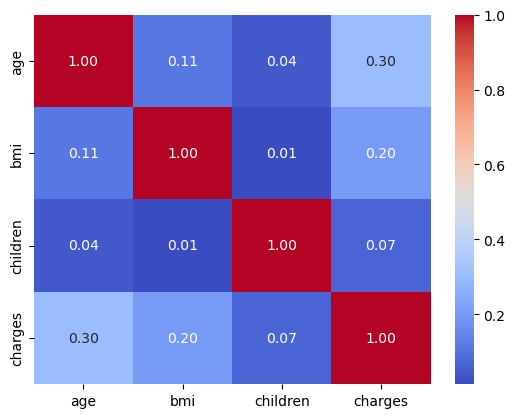

In [15]:
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

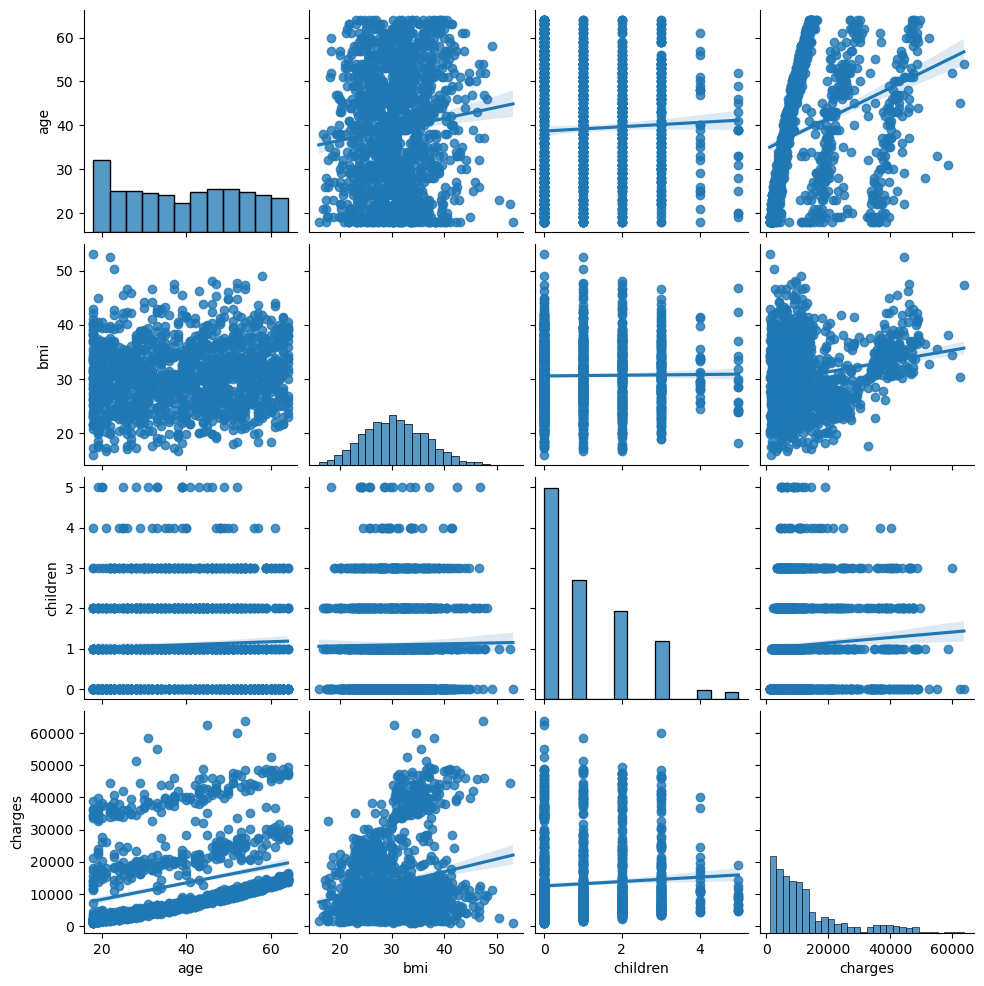

In [16]:
sns.pairplot(df, kind = 'reg')
plt.show()

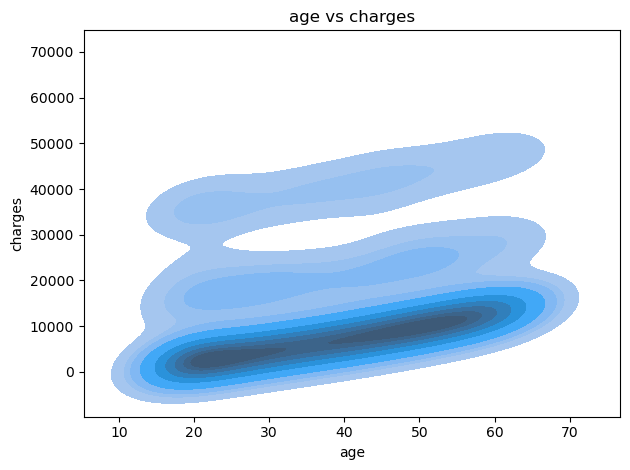

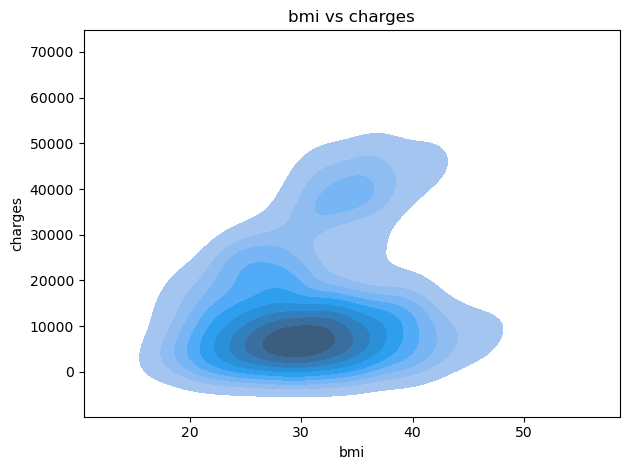

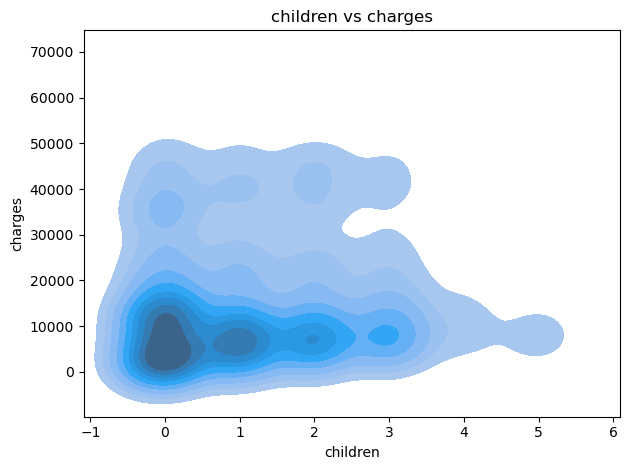

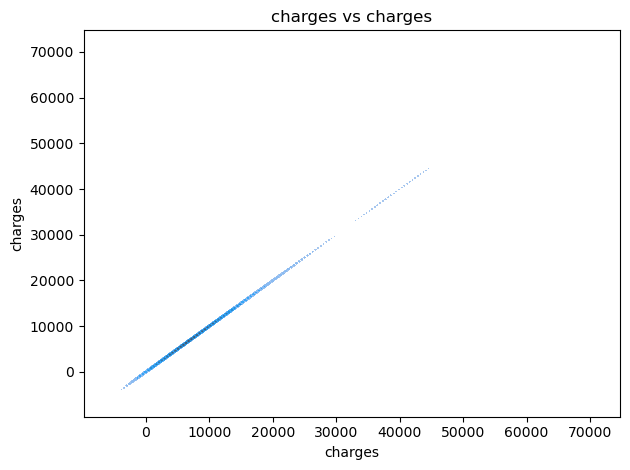

In [17]:
for column in numerical_features:
        sns.kdeplot(
            x=df[column], 
            y=df['charges'], 
            fill=True, 
            thresh=0.05
        )
        plt.title(f'{column} vs charges')
        plt.xlabel(column)
        plt.ylabel('charges')
        plt.tight_layout()
        plt.show()

# Categorical Features

In [18]:
for column in categorical_features:
    print(df[column].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64
bmi_category
Obese          705
Overweight     386
Healthy        226
Underweight     21
Name: count, dtype: int64


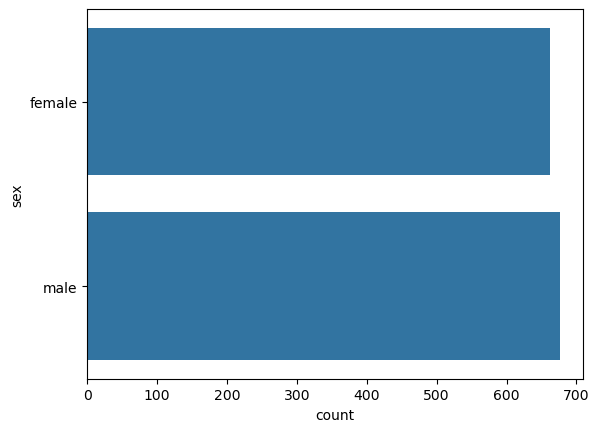

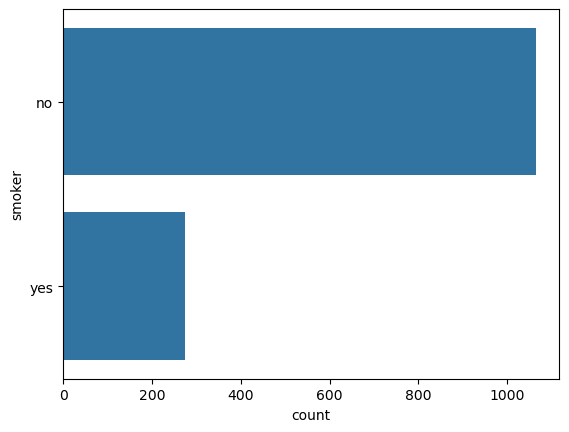

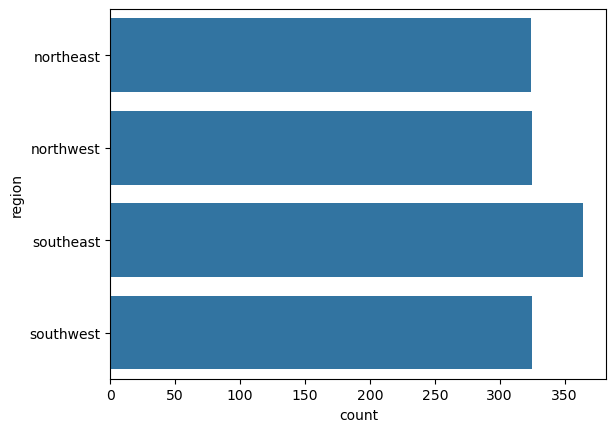

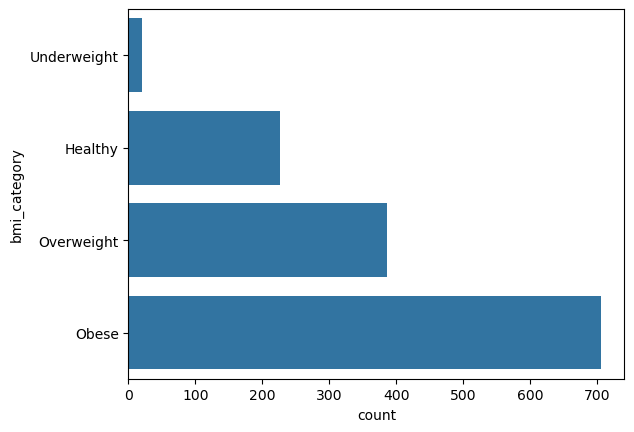

In [19]:
for column in categorical_features:
    sns.countplot(df[column])
    plt.show()

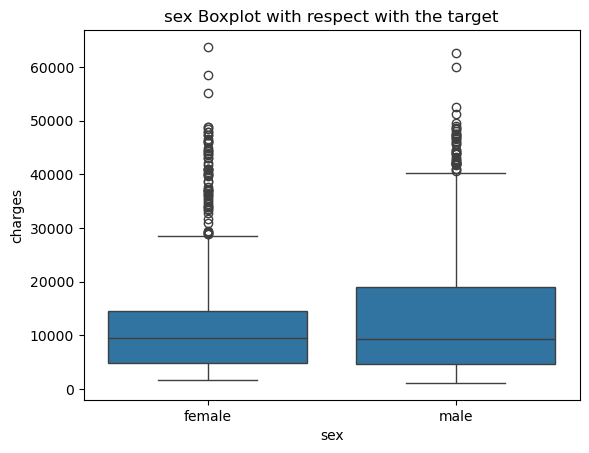

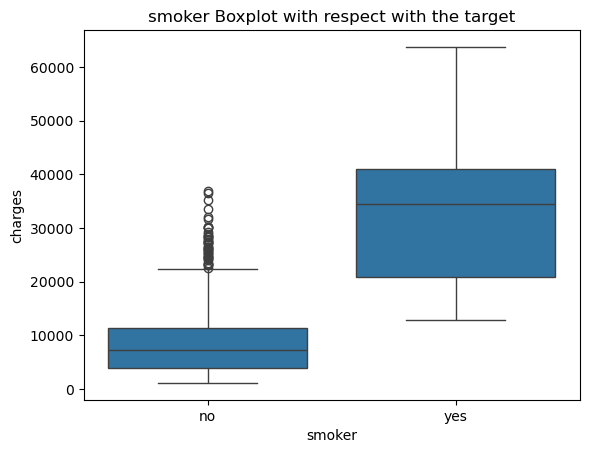

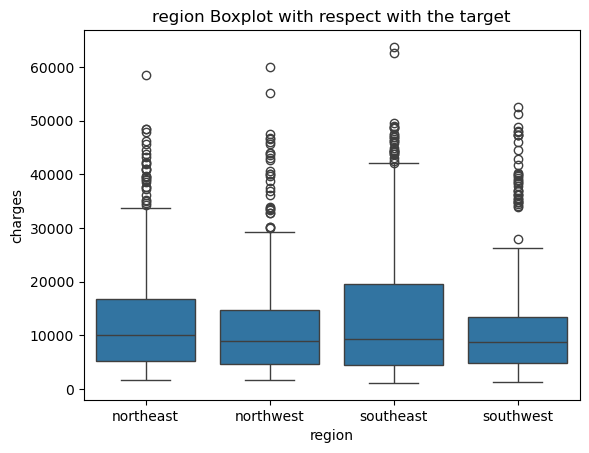

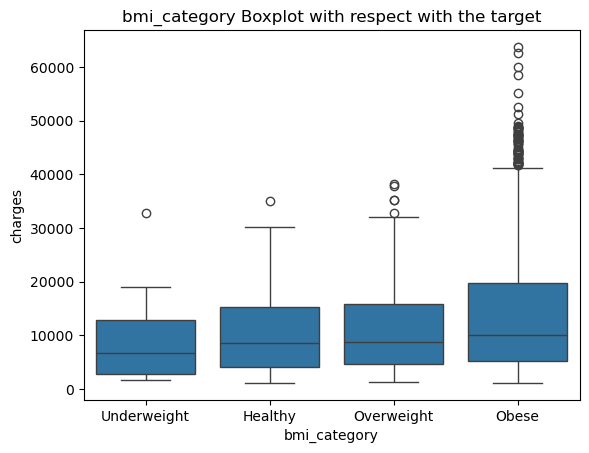

In [20]:
for column in categorical_features:
    sns.boxplot(data=df, x=column, y=target)
    plt.title(f'{column} Boxplot with respect with the target')
    plt.show()

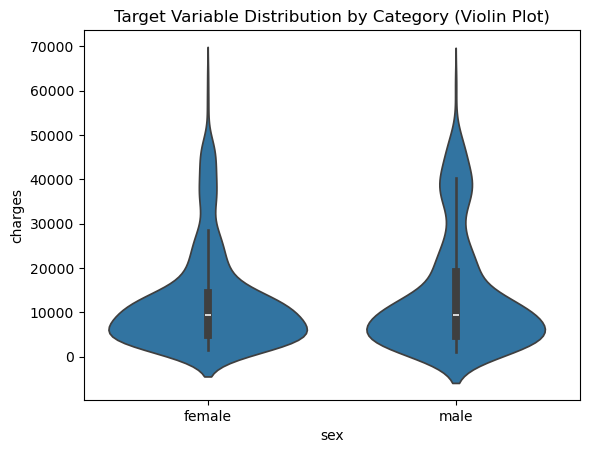

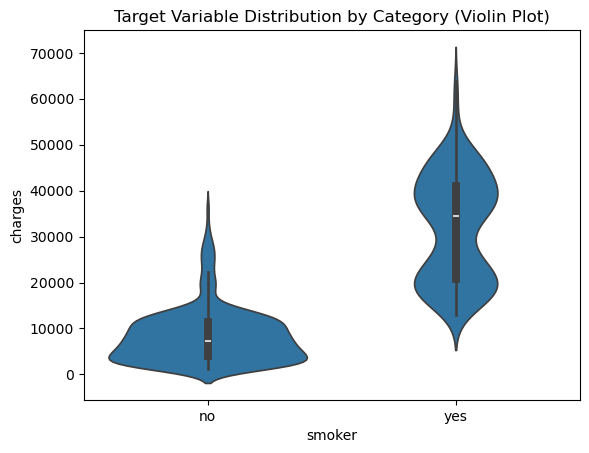

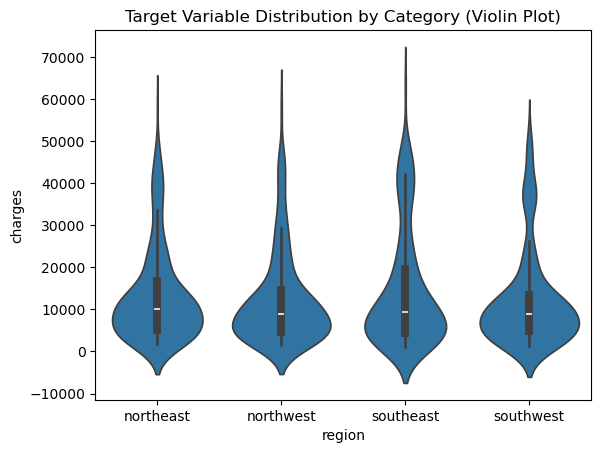

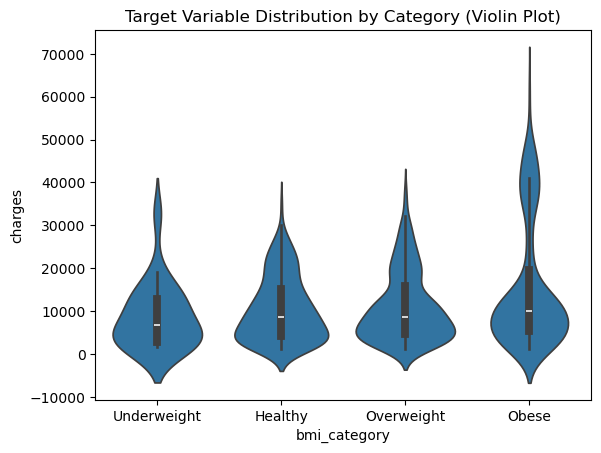

In [21]:
for column in categorical_features:
    sns.violinplot(data=df, x=column, y=target)
    plt.title('Target Variable Distribution by Category (Violin Plot)')
    plt.show()

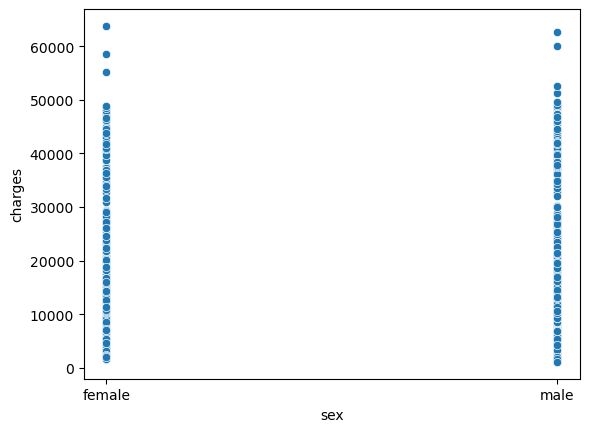

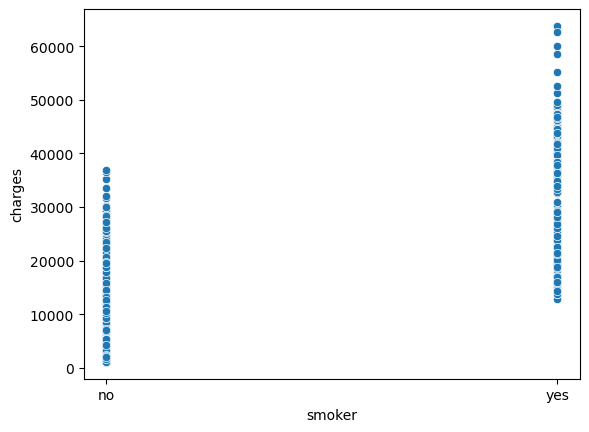

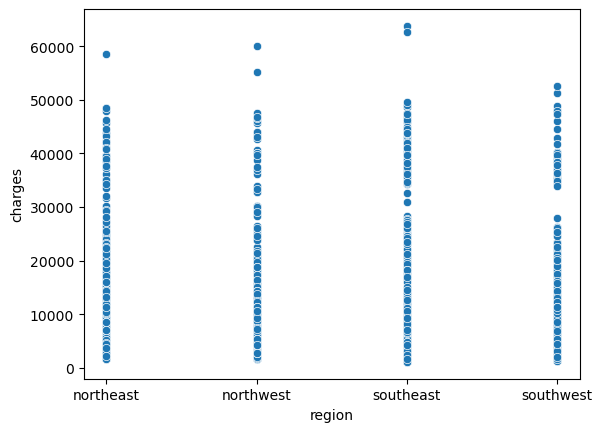

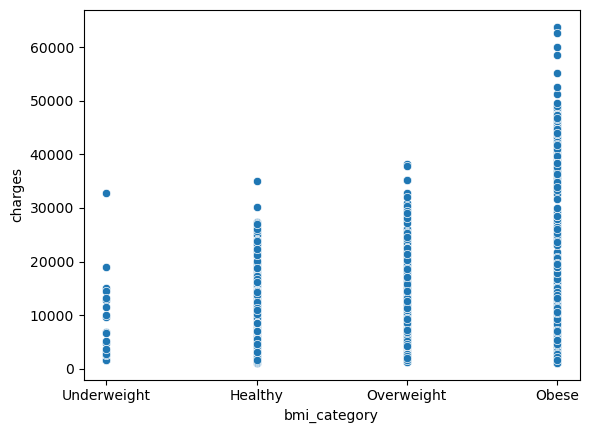

In [22]:
for column in categorical_features:
    sns.scatterplot(data=df, x=column, y=target)
    plt.show()

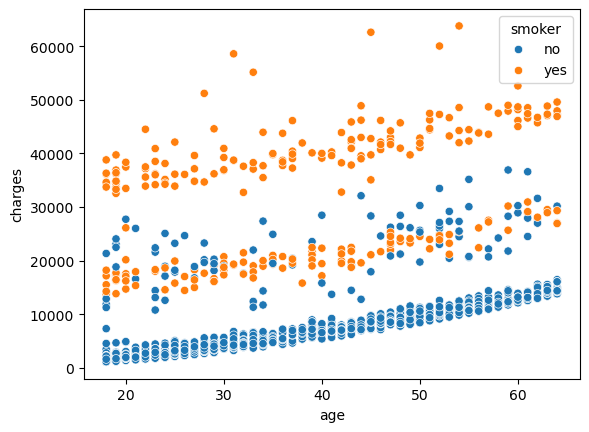

In [29]:
sns.scatterplot(data=df, x='age', y=target, hue='smoker')
plt.show()

# Notes

1 - No missing values

2 - I only have to change the object features into categories

3 - In terms of outliers using boxplots (IQR method) there are some really high bmi clients. I'll double check using the scatter plots with respect to the target variable. There are some strange cases with people with 18 years old with 1 or even more children. Probably it's people that didn't provide the correct age or a typo.

4 - In terms of correlation to the target variable, in the numerical features there seems to be very low correlations. Only age seem to have a very small increase in charges. For the categorical variables, logically smokers seem to have higher charges

5 - Feature Engineering

    5.1 - In terms of feature generation, I'll add a feature related with the BMI: <18.5 Underweight, 18.5-25 Healthy,  25-30 Overweight, >30 Obese
    There seems to have a small relationship between the BMI category and the charges. I was expecting underweight to also have higher charges but this doesn't happen. The charges seem to grow as the person is in a higher category. I will use one hot encoding to create variables with this "status" of the person

    5.2 - I could also add a column with information if the person has children